In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import train_test_split

In [ ]:
data = pd.read_csv('train.csv')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Data Exploration:

1) For numeric data
Made histograms to understand distributions we can also use Corrplot Pivot table to compare survival rate across numeric variables

2) For Categorical Data
Make bar charts to understand balance of classes, Make pivot tables to understand relationship with survival.

# Let’s check our missing values

In [ ]:
percent = data.isnull().sum()/len(data)*100
missing_data = pd.concat([data.isnull().sum(), percent_1],axis=1,keys=['Total','%'])
missing_data

,Total,%
PassengerId,0,0.000000
Survived,0,0.000000
Pclass,0,0.000000
Name,0,0.000000
Sex,0,0.000000
Age,177,19.865320
SibSp,0,0.000000
Parch,0,0.000000
Ticket,0,0.000000
Fare,0,0.000000


- PassengerId should be removed.

- Age has 177 (20%) missing values. We can use the mean by sex to replace missing values.

- Cabin has more than 77% of missing values, we can drop it. We can also change its calue to 1 for known and 0for unknown.

- The Embarked feature has only 2 missing values, We can use mode to fill the NaN values.

In [ ]:
data.drop(columns={'PassengerId'},axis=1,inplace=True)

In [ ]:
data.drop(columns={'Cabin','Ticket'},inplace=True)

In [ ]:
def replace_missing_Values(data):
    ###Age
    meanAge = data.groupby(['Sex'])['Age'].transform('mean')
    data['Age'] = data['Age'].fillna(meanAge)
    #Embarked
    data['Embarked'].fillna(data['Embarked'].mode()[0], inplace = True)    

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64


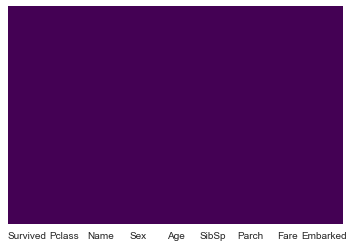

In [ ]:
replace_missing_Values(data)
print(data.isnull().sum())
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')


 # Let's identify quantative and categorical variables 

In [ ]:
#describe()identifies numerical columns
data.describe().columns

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [ ]:
data.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,8.0500,S
5,0,3,"Moran, Mr. James",male,30.726645,0,0,8.4583,Q
6,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,51.8625,S
7,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,21.0750,S
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,11.1333,S
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,30.0708,C


In [ ]:
data_num = data[['Age', 'SibSp', 'Parch', 'Fare']]
data_cat = data[['Pclass','Sex','Embarked']]


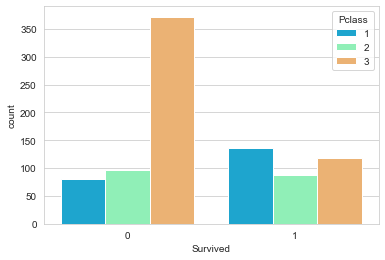

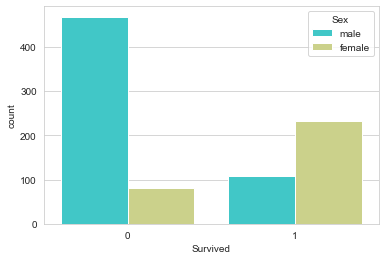

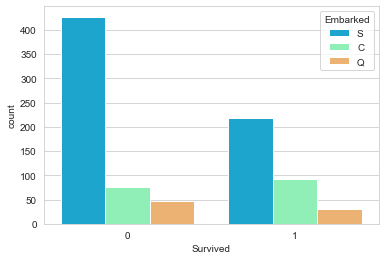

In [ ]:
for i in data_cat.columns:
    #sns.barplot(data[i].value_counts().index,data[i].value_counts()).set_title(i)
    #plt.show()\
     
    sns.set_style('whitegrid')
    sns.countplot(x='Survived',hue=i,data=data,palette='rainbow')   
    plt.show()

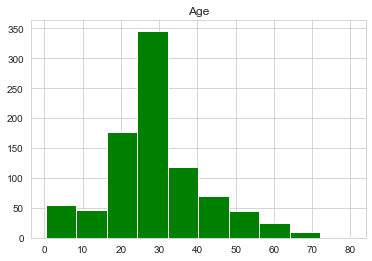

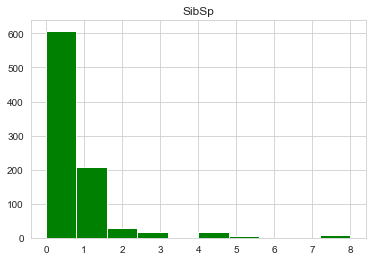

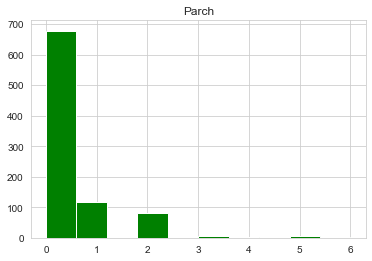

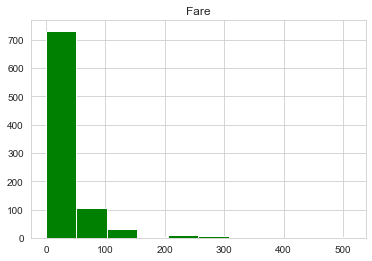

In [ ]:
import matplotlib.pyplot as plt
for i in data_num:
    plt.hist(data[i],color='green')
    plt.title(i)
    plt.show()
    


In [ ]:
data_cat


,Pclass,Sex,Embarked
0,3,male,S
1,1,female,C
2,3,female,S
3,1,female,S
4,3,male,S
...,...,...,...
886,2,male,S
887,1,female,S
888,3,female,S
889,1,male,C


# Data Correlation

In [ ]:
#Pearson correlation
print(data.corr())

          Survived    Pclass       Age     SibSp     Parch      Fare
Survived  1.000000 -0.338481 -0.080453 -0.035322  0.081629  0.257307
Pclass   -0.338481  1.000000 -0.330391  0.083081  0.018443 -0.549500
Age      -0.080453 -0.330391  1.000000 -0.236920 -0.182556  0.089079
SibSp    -0.035322  0.083081 -0.236920  1.000000  0.414838  0.159651
Parch     0.081629  0.018443 -0.182556  0.414838  1.000000  0.216225
Fare      0.257307 -0.549500  0.089079  0.159651  0.216225  1.000000


- The above table shows that age is highly correlated to the class survived, fare is positivly related with survived.

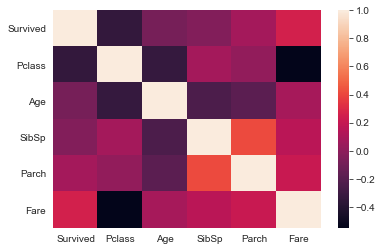

In [ ]:
sns.heatmap(data.corr())

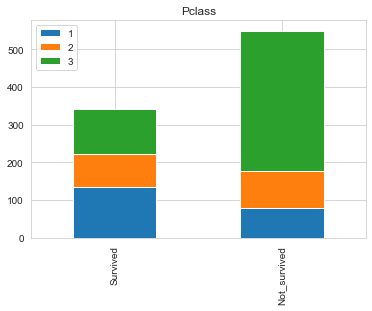

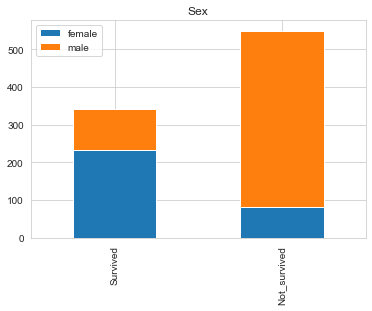

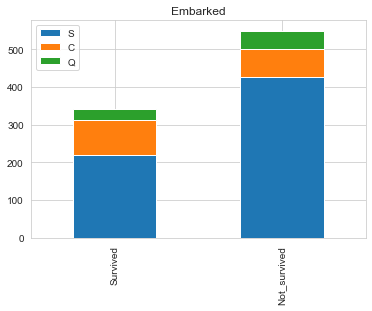

In [ ]:
def bar_chart(feature):
    survived = data[data['Survived']==1][feature].value_counts()
    not_survived = data[data['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived,not_survived])
    df.index=['Survived','Not_survived']
    df.plot(kind='bar',stacked=True,fig=(18,6),title=feature)
for i in data_cat:
     bar_chart(i)

the plots above shows that:
    - The 3rd class passengers got less chance to survive.
    - the number of female that survived is greater than the number of man.

#### Distribution of Embarked, Pclass and Sex for surviving and dead passengers


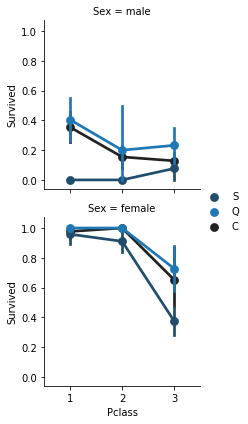

In [ ]:
FacetGrid = sns.FacetGrid(data, row='Sex')
FacetGrid.map(sns.pointplot, 'Pclass', 'Survived', 'Embarked', palette=None,  order=None, hue_order=None )
FacetGrid.add_legend()

- Women on port Q and on port S have a higher chance of survival

# Converting Categorical Features

We need to convert categorical features to numerical variables. Otherwise our algorithm won't be able to directly take in those features as inputs.

To do so we have seen OneHotEncoder that processs string values directly. If your nominal features are strings, then you need to first map them into integers.

In this example we are going to use : pandas.get_dummies 

pandas.get_dummies is kind of the opposite of one hot encoding. By default, it only converts string columns into one-hot representation, unless columns are specified.


In [ ]:
sex = pd.get_dummies(data['Sex'],drop_first=True)
embark = pd.get_dummies(data['Embarked'],drop_first=True)
data.drop(['Sex','Embarked','Name'],axis=1,inplace=True)
data = pd.concat([data,sex,embark],axis=1)
data.head(20)


,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.000000,1,0,7.2500,1,0,1
1,1,1,38.000000,1,0,71.2833,0,0,0
2,1,3,26.000000,0,0,7.9250,0,0,1
3,1,1,35.000000,1,0,53.1000,0,0,1
4,0,3,35.000000,0,0,8.0500,1,0,1
5,0,3,30.726645,0,0,8.4583,1,1,0
6,0,1,54.000000,0,0,51.8625,1,0,1
7,0,3,2.000000,3,1,21.0750,1,0,1
8,1,3,27.000000,0,2,11.1333,0,0,1
9,1,2,14.000000,1,0,30.0708,0,0,0


# Logistic Regression

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data.drop('Survived',axis=1), 
                                                    data['Survived'], 
                                                    test_size=0.30, 
                                                    random_state=200)


In [ ]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

C:\Users\yanis\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
predictions = logmodel.predict(X_test)

In [ ]:
accuracy=confusion_matrix(y_test,predictions)

In [ ]:
accuracy=accuracy_score(y_test,predictions)
accuracy

0.7723880597014925

In [ ]:
from sklearn.metrics import classification_report


In [ ]:
print(classification_report(y_test,predictions))


              precision    recall  f1-score   support

           0       0.80      0.84      0.82       165
           1       0.72      0.66      0.69       103

    accuracy                           0.77       268
   macro avg       0.76      0.75      0.76       268
weighted avg       0.77      0.77      0.77       268

